In [1]:
import importlib

import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# For data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For model building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For model evaluation
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [9]:
# General mathematical Functions
def percent(val, total):
    return round(100 * val/total, 2)

def getIQR(df, col):
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    return Q3 - Q1

def getMinScore(df, col):
    Q1 = df[col].quantile(0.75)
    iqr = getIQR(df, col)
    return Q1 - 1.5 * iqr

def getMaxScore(df, col):
    Q3 = df[col].quantile(0.75)
    iqr = getIQR(df, col)
    return Q3 + 1.5 * iqr

In [7]:
# General Dataframe functions
def listColumsWithMissingData(df):
    naCols = len(df.columns[df.isna().any()])
    print(f"Columns with missing data: {naCols} {percent(naCols, len(df.columns))}%")
    [print(f"{col:30}  {df[col].isna().sum(): 7d} {percent(df[col].isna().sum(),df.shape[0])}%") for col in df.columns if df[col].isna().any() ]

def listColumsWithInvalidData(df):
    COLS = df.columns.tolist()
    TOTAL = df.shape[0]
    print(f"Columns with invalid data:", end="")
    invalidColCount = 0
    invalidColDetails = ""
    for col in COLS:
        cnt = df[df[col].isin(['XNA','XAP'])].shape[0]
        if cnt > 0:
            invalidColCount += 1
            invalidColDetails += f"{col}: {cnt} {percent(cnt, TOTAL)}%\n"
    print(invalidColCount)
    print(invalidColDetails)

def getCategoricalValues(df):
    cat_columns = df.select_dtypes(include=['object']).columns.tolist()
    cat_columns.sort()
    print(f"Columns with categorical values {len(cat_columns)} --> {cat_columns}")
    for col in cat_columns:
        count_values = df[col].unique().shape[0]
        print(f"{col:27} : [{count_values:2}] --> {sorted((df[col].unique().tolist())) if np.NaN not in df[col].unique().tolist() else (df[col].unique().tolist())}")
        

def describeWoIdTarget(df):
    print("Numerical values - describe:")
    colsWoIdTarget = list(set(df.columns.tolist() ) - set(['SK_ID_CURR', 'TARGET']))
    df = df[colsWoIdTarget]
    print(df.describe())
    
def getGeneralInfo(df):
    print("Shape:",df.shape);print()
    print("Columns:", df.columns.tolist());print()
    print(df.info());print()
    describeWoIdTarget(df);print()
    getCategoricalValues(df);print()
    listColumsWithMissingData(df);print()
    listColumsWithInvalidData(df)


In [10]:
df = pd.read_csv("wisc_bc_data.csv")
getGeneralInfo(df)

Shape: (569, 32)

Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'points_se', 'symmetry_se', 'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean

In [12]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:title={'center':'perimeter_mean'}, xlabel='diagnosis'>

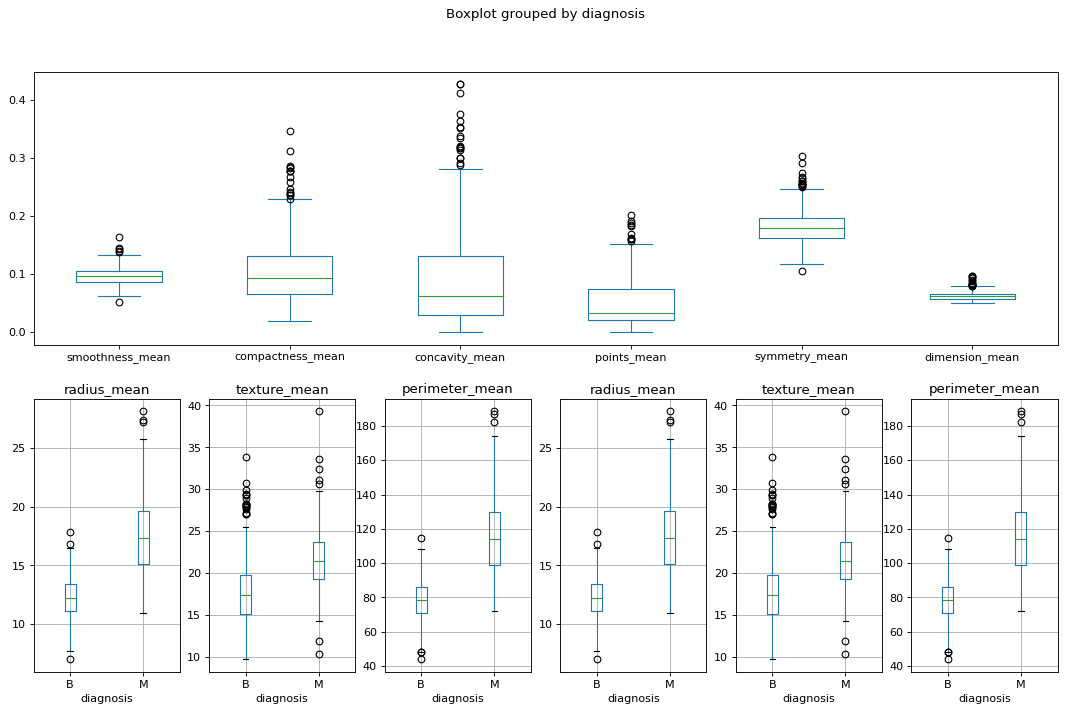

In [24]:
# Check the distribution of values in the columns
plt.figure(figsize=(16, 10), dpi=80)

ax = plt.subplot(2, 1, 1); df[[ 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean']].plot.box(ax=ax)

#'radius_mean', 'texture_mean',
#'area_mean','perimeter_mean',

ax = plt.subplot(2, 6, 7); df.boxplot(column=['radius_mean'], by='diagnosis', ax=ax) 
ax = plt.subplot(2, 6, 8); df.boxplot(column=['texture_mean'], by='diagnosis', ax=ax) 
ax = plt.subplot(2, 6, 9); df.boxplot(column=['perimeter_mean'], by='diagnosis', ax=ax)
ax = plt.subplot(2, 6, 10); df.boxplot(column=['radius_mean'], by='diagnosis', ax=ax) 
ax = plt.subplot(2, 6, 11); df.boxplot(column=['texture_mean'], by='diagnosis', ax=ax) 
ax = plt.subplot(2, 6, 12); df.boxplot(column=['perimeter_mean'], by='diagnosis', ax=ax)

- No missing data